In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_houses, y_houses = fetch_california_housing(return_X_y=True, as_frame=True)
df_houses.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
df_houses.corr(method='pearson')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [ ]:
X = df_houses
results = sm.OLS(y_houses, sm.add_constant(X)).fit()
print(results.summary())
#print(results.rsquared)
print(np.sqrt(results.mse_total))

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:08:56   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X = df_houses
X = X.drop(columns=['Population'])
X = X.drop(columns=['AveOccup'])
X = X.drop(columns=['AveRooms'])
X = X.drop(columns=['AveBedrms'])
X = X.drop(columns=['HouseAge'])
#X = X.drop(columns=['Longitude'])
#X = X.drop(columns=['Latitude'])
results = sm.OLS(y_houses, sm.add_constant(X)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     9667.
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:22:02   Log-Likelihood:                -23184.
No. Observations:               20640   AIC:                         4.638e+04
Df Residuals:                   20636   BIC:                         4.641e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.7327      0.621    -67.170      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


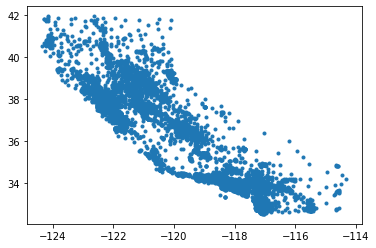

In [ ]:
plt.plot(df_houses['Longitude'], df_houses['Latitude'],".")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     5302.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:29:47   Log-Likelihood:                -1640.7
No. Observations:                1001   AIC:                             3285.
Df Residuals:                     999   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3671      0.079    106.184      0.0

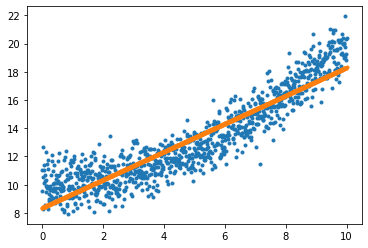

In [ ]:
X = np.linspace(0,10,1001)
Y = 10 + 0.1 * X*X + np.random.randn(len(X))*1
X2 = X
results = sm.OLS(Y, sm.add_constant(X2)).fit()
print(results.summary())
plt.plot(X,Y,".")
pred = np.ones(len(X)) * results.params[0] + X * results.params[1]
plt.plot(X,pred,".")
plt.show()

(1001, 3)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     2017.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:23:02   Log-Likelihood:                -2114.2
No. Observations:                1001   AIC:                             4236.
Df Residuals:                     997   BIC:                             4256.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8322      0.257     38.25

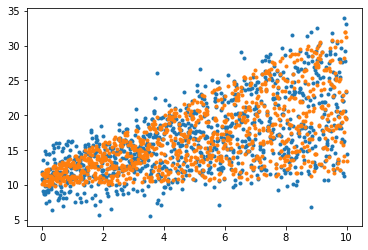

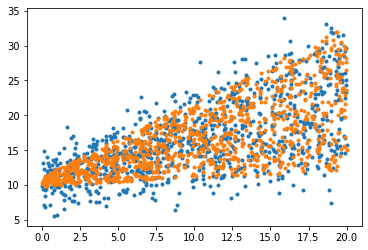

In [ ]:
Xa = np.linspace(0,10,1001)
Xb = np.random.rand(len(Xa))*20
Y = 10 + 0.1 * Xa + 0.1 * Xb + 0.1 * Xa*Xb + np.random.randn(len(Xa))*2.0
X = np.transpose([Xa,Xb,Xa*Xb])
print(np.shape(X))
results = sm.OLS(Y, sm.add_constant(X)).fit()
print(results.summary())
pred = np.ones(len(X)) * results.params[0] + Xa * results.params[1] + Xb * results.params[2] + Xa * Xb * results.params[3]
plt.plot(Xa,Y,".")
plt.plot(Xa,pred,".")
plt.show()
plt.plot(Xb,Y,".")
plt.plot(Xb,pred,".")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     8674.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:30:25   Log-Likelihood:                -1428.1
No. Observations:                1001   AIC:                             2860.
Df Residuals:                     999   BIC:                             2870.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0267      0.048    209.714      0.0

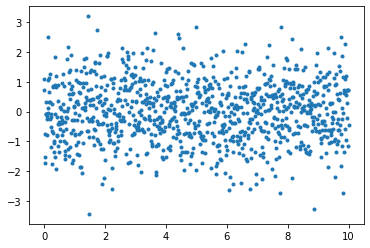

In [ ]:
X = np.linspace(0,10,1001)
Y = 10 + 0.1 * X*X + np.random.randn(len(X))*1
results = sm.OLS(Y, sm.add_constant(X*X)).fit()
print(results.summary())
resid = results.resid
plt.plot(X,resid,".")
#pred = np.ones(len(X)) * results.params[0] + X * results.params[1]
#plt.plot(X,pred,".")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     270.4
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           3.40e-30
Time:                        15:38:32   Log-Likelihood:                -6.9625
No. Observations:                 102   AIC:                             17.92
Df Residuals:                     100   BIC:                             23.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8828      0.048    203.938      0.0

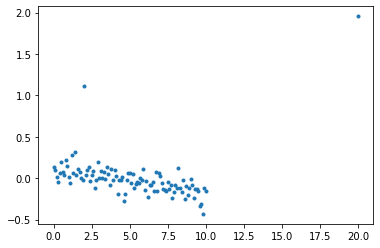

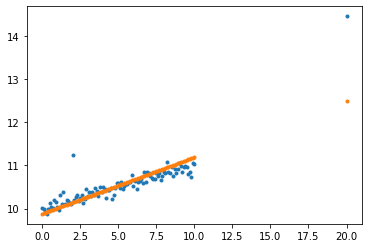

In [ ]:
X = np.linspace(0,10,101)
X = np.append(X,20)
Y = 10 + 0.1 * X + np.random.randn(len(X))*0.1
Y[20] = 1.1 * Y[20]
Y[-1] = 1.2 * Y[-1]
results = sm.OLS(Y, sm.add_constant(X)).fit()
print(results.summary())

resid = results.resid
plt.plot(X,resid,".")
plt.show()

plt.plot(X,Y,".")
pred = np.ones(len(X)) * results.params[0] + X * results.params[1]
plt.plot(X,pred,".")
plt.show()

(101, 1)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     497.6
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           2.13e-40
Time:                        15:49:21   Log-Likelihood:                 25.738
No. Observations:                 101   AIC:                            -47.48
Df Residuals:                      99   BIC:                            -42.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0628      0.037    268.926

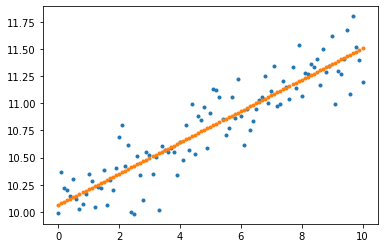

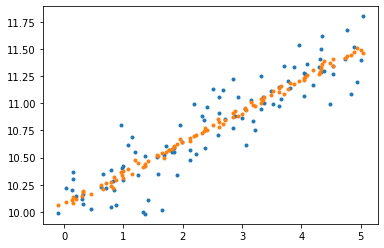

In [ ]:
Xa = np.linspace(0,10,101)
Xb = 0.5 * Xa + np.random.randn(len(Xa))*0.1
Y = 10 + 0.1 * Xa + 0.1 * Xb + np.random.randn(len(Xa))*0.2
X = np.transpose([Xa])
print(np.shape(X))
results = sm.OLS(Y, sm.add_constant(X)).fit()
print(results.summary())
pred = np.ones(len(X)) * results.params[0] + Xa * results.params[1] #+ Xb * results.params[2]
plt.plot(Xa,Y,".")
plt.plot(Xa,pred,".")
plt.show()
plt.plot(Xb,Y,".")
plt.plot(Xb,pred,".")
plt.show()

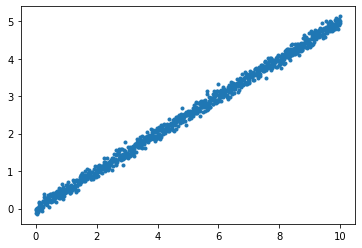

In [ ]:
Xa = np.linspace(0,10,1001)
Xb = 0.5 * Xa + np.random.randn(len(Xa))*0.1
plt.plot(Xa,Xb,".")